* Download and install 'ffmpeg' codec on your PC - this is mandatory for animations to run properly!!!
* Link to 'ffmpeg' codec: ( http://ffmpeg.org/download.html )
* Link to the ffmpeg installation tutorial: ( http://blog.gregzaal.com/how-to-install-ffmpeg-on-windows/ )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os
os.system('ffmpeg')

sns.set(rc={'figure.figsize':(10, 7)})

import warnings
warnings.filterwarnings('ignore')

from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation

# to display animation in notebook
from IPython.display import HTML

In [29]:
fig, ax = plt.subplots()

ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))
ax.grid(True)

# create a line which we'll animate
line, = plt.plot([], [], lw=2)

# function used to draw a clear frame
def init():
    
    line.set_data([], [])
    
    return line,

# called sequentialy on each frame
def update(frame):
    
    x = np.linspace(0, 2, 1000)
    y = np.cos(2 * np.pi * (x - 0.05 * frame))
    
    line.set_data(x, y)
    
    return line,

# hide static plot
plt.close()

ani = FuncAnimation( fig, update, frames=500, interval=10, init_func=init, blit=True )
HTML(ani.to_html5_video()) # init html player just for this moment

#ani.save('D:/cosine_function.mp4', fps=30)

In [30]:
plt.rcParams["animation.html"] = "html5" # init html player in advance for the whole code
ani

In [31]:
'''
======================================================================================
3. Animating multiple objects
'''

fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
ax.grid(True)

frame_text = ax.text(0.05, 1.9, '', bbox=dict(facecolor='white', alpha=1))

cos_line, = plt.plot([], [], lw=2, c='b', label='cos')
sin_line, = plt.plot([], [], lw=2, c='r', label='sin')

plt.legend()

# function used to draw a clear frame
def init():
    
    cos_line.set_data([], [])
    sin_line.set_data([], [])
    
    frame_text.set_text('')
    
    return cos_line, sin_line, frame_text

# called sequentialy on each frame
def update(frame):
    
    x = np.linspace(0, 2, 1000)
    
    cos_x = np.cos(2 * np.pi * (x - 0.01 * frame))
    sin_x = np.sin(2 * np.pi * (x - 0.05 * frame))
    
    cos_line.set_data(x, cos_x)
    sin_line.set_data(x, sin_x)
    
    frame_text.set_text('frame = %d' % frame)
    
    return cos_line, sin_line, frame_text

# hide static plot
plt.close()

ani = FuncAnimation(fig, update, frames=300, interval=20, init_func=init, blit=True)
ani

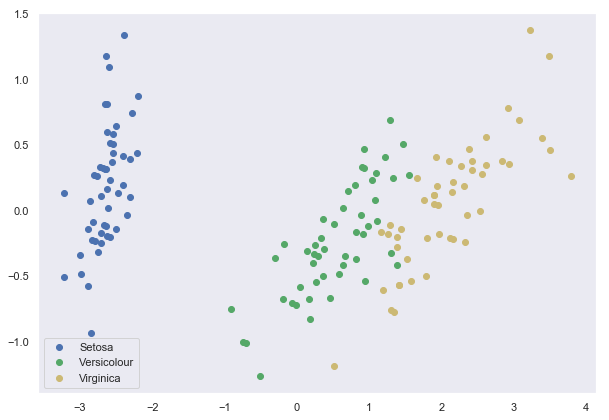

In [32]:
'''
======================================================================================
4. Animating KMeans

'''

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import decomposition

iris = datasets.load_iris()
X = iris.data
y = iris.target

pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
X_pca.shape

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'yo', label='Virginica')
plt.grid(False)
plt.legend(loc=0);


In [33]:

fig, ax = plt.subplots()
ax.set_xlim((-3.5, 4))
ax.set_ylim((-1.5, 1.5))
ax.grid(False)
ims = []

# initial centroids
init = np.array([-1, 0.5, 3, 1, 3, -0.5]).reshape((3,2))

for i in range(10):
    
    txt = plt.text(-.5, 1.4, 'Iteration = {}'.format(i+1), bbox=dict(facecolor='white', alpha=1)) 

    kmeans = KMeans(n_clusters=3, init=init, max_iter=i+1, random_state=6)
    y = kmeans.fit_predict(X_pca, y)
    
    centers = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r', marker='X')
    
    c1, = plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo')
    c2, = plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go')
    c3, = plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'yo')
    
    ims.append([centers, c1, c2, c3, txt])

# hide static plot
plt.close()   

ani = ArtistAnimation(fig, ims, interval=1500, repeat_delay=1000, blit=False)
ani    